<a href="https://colab.research.google.com/github/Krieg2065/Python/blob/main/preparazione_verifica_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Situazione


Il Comune di Milano vuole fare un'analisi riguardante le aree di sosta per il parcheggio delle biciclette.
Ha messo a disposizione quindi tre dataset (in allegato) e ha chiesto di avere un report con le seguenti informazioni:


- una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette
- una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere
- i nomi dei quartieri in cui non ci sono aree di sosta;
- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta
- il nome del quartiere con più aree di sosta;
- una mappa di Milano con l'indicazione del quartiere con più aree di sosta;
- i nomi dei quartieri con un numero di aree di sosta minori della media;

- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;
- una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;
- una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

Richiesta

Creare un notebook Python che permetta di avere tutte le informazioni richieste sopra, Prevedere inoltre la possibilità per l'utente di avere le seguenti informazioni aggiuntive:


- data una via (inserita dall'utente), avere le aree di sosta di quella via

- dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta
- date le coordinate geografiche di un punto (inserite dall'utente), avere una mappa che visualizzi le aree di sosta a meno di 500 m da quel punto;



Controllare che l'input dell'utente sia accettabile.


In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [3]:
import geopandas as gpd
import pandas as pd
import contextily

In [4]:
aree_sosta = gpd.read_file("/content/drive/MyDrive/geopandas/data2/bike_areesosta.zip")
stradario = gpd.read_file("/content/drive/MyDrive/geopandas/data2/stradario.csv")
milano = gpd.read_file("/content/drive/MyDrive/geopandas/data2/ds964_nil_wm.zip")

In [5]:
stradario.drop(["geometry"], axis=1,inplace = True)
stradario_senza_dop = stradario.drop_duplicates(subset=["CODICE_VIA"])

In [6]:
bike_vie = pd.merge(aree_sosta,stradario_senza_dop ,how = "inner", left_on = "id_via", right_on ="CODICE_VIA")


In [7]:
bike_vie

id_amat id_via num_civico municipio  ... BARRATO  CAP  SEZIONE  MUNICIPIO
0           2   5339          0         5  ...          142     2066          5
1           4   1545         21         9  ...          161     1216          9
2           8   6330         42         7  ...          153     2117          7
3         771   6330         40         7  ...          153     2117          7
4           9   7165          4         8  ...          149      444          8
...       ...    ...        ...       ...  ...     ...  ...      ...        ...
1471     3232   1242         72         9  ...          158     1954          9
1472     3233   1242         72         9  ...          158     1954          9
1473     3234   1242         72         9  ...          158     1954          9
1474     3235   1242         72         9  ...          158     1954          9
1475     3243   4290         36         5  ...          139     1855          4

[1476 rows x 20 columns]

In [8]:
bike_vie.groupby(["DESCRIZIONE_VIA","CIVICO"]).sum()[["stalli_tot"]].reset_index()

DESCRIZIONE_VIA CIVICO  stalli_tot
0              ABBAZIA      4          12
1        ABBIATEGRASSO      1          15
2      ABBIATI FILIPPO      1          20
3              ABRUZZI      1          58
4            ACCADEMIA      3           4
..                 ...    ...         ...
654        XXIV MAGGIO      1          35
655               ZARA      1          50
656  ZENALE BERNARDINO      3          10
657          ZOIA FLLI      3          30
658             ZURIGO      2          10

[659 rows x 3 columns]

In [9]:
aree_sosta["id_via"] = aree_sosta["id_via"].astype(str)
stradario_senza_dop["CODICE_VIA"] = stradario_senza_dop["CODICE_VIA"].astype(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2. una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [10]:
elenco_aree_quartieri = gpd.sjoin(bike_vie, milano, op= "within", how= "inner")
elenco_aree_quartieri

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


id_amat id_via num_civico  ...    Shape_Leng    Shape_Area OBJECTID
0           2   5339          0  ...   8831.940397  3.232115e+06      148
48         55   5438          6  ...   8831.940397  3.232115e+06      148
49        164   5438          1  ...   8831.940397  3.232115e+06      148
50        185   5438          2  ...   8831.940397  3.232115e+06      148
219       170   5323         24  ...   8831.940397  3.232115e+06      148
...       ...    ...        ...  ...           ...           ...      ...
1383     2837   6366       None  ...   2995.497099  5.132969e+05      124
1182     1812   1697       None  ...  11741.717005  1.532331e+06       93
1183     1813   1697       None  ...  11741.717005  1.532331e+06       93
1299     2394   7465         75  ...   6789.327807  7.076301e+05      134
1439     3055   4375       None  ...  33829.221463  1.373384e+07      144

[1467 rows x 29 columns]

3. i nomi dei quartieri in cui non ci sono aree di sosta;

In [11]:
quartieri_senza_aree = milano[~milano.intersects(aree_sosta.unary_union)]
quartieri_senza_aree

ID_NIL  ...                                           geometry
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
22      75  ...  POLYGON ((9.13009 45.50820, 9.13016 45.50784, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
48      31  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
80      73  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[12 rows x 9 columns]

4. una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

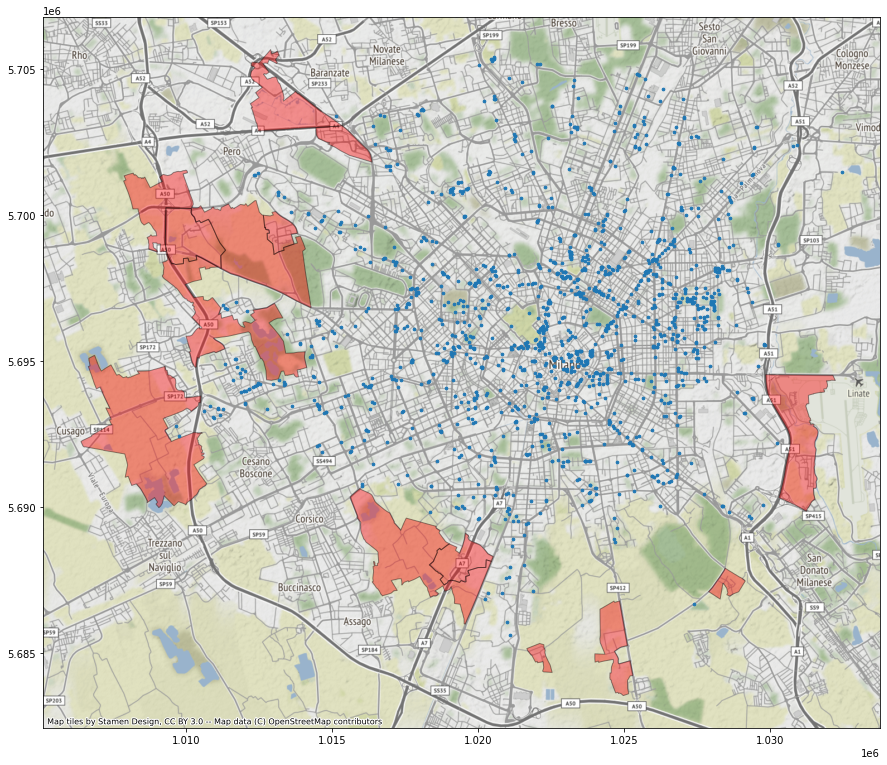

In [12]:
ax = quartieri_senza_aree.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k")
aree_sosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7)
contextily.add_basemap(ax)

5. il nome del quartiere con più aree di sosta;

In [13]:
duomoGeo = elenco_aree_quartieri.groupby("NIL").count()["geometry"].reset_index()
quartiere_con_piu_aree = duomoGeo[duomoGeo["geometry"] == duomoGeo["geometry"].max()]
quartiere_con_piu_aree

NIL  geometry
17  DUOMO       132

In [14]:
merge1 = pd.merge(milano, quartiere_con_piu_aree, on= "NIL", how= "inner")
merge1.rename(columns={"geometry_x": "geometry"}, inplace= True)


In [15]:
merge1

ID_NIL    NIL  ...                                           geometry geometry_y
0       1  DUOMO  ...  POLYGON ((9.19482 45.47201, 9.19495 45.47213, ...        132

[1 rows x 10 columns]

6. una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

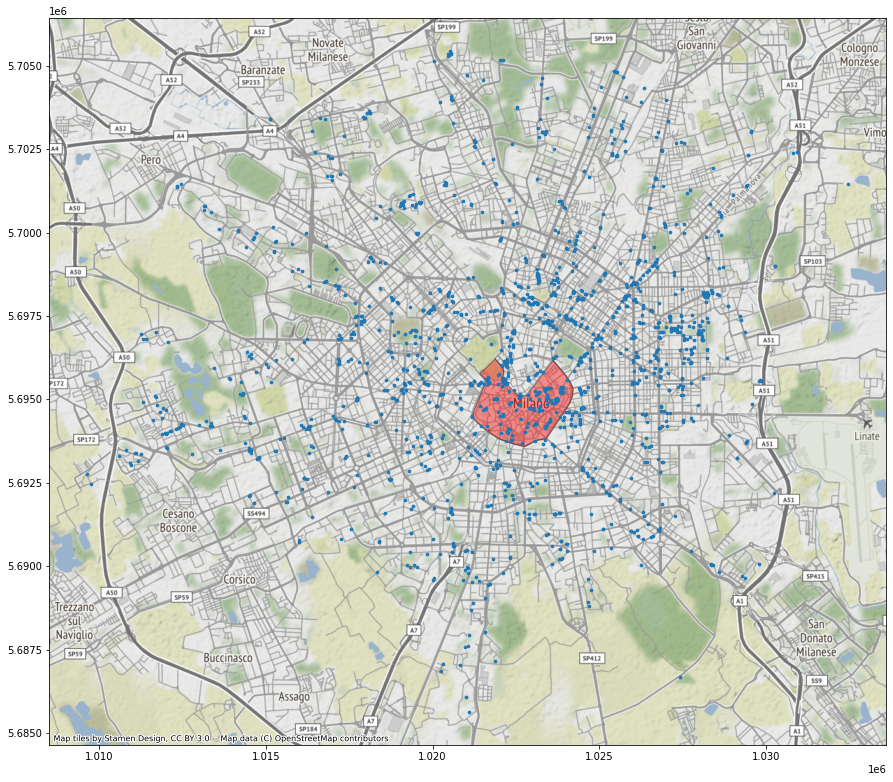

In [16]:
ax = merge1.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k")
aree_sosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7)
contextily.add_basemap(ax)

7. i nomi dei quartieri con un numero di aree di sosta minori della media

In [17]:
quar_mino_media = duomoGeo[duomoGeo["geometry"] <  duomoGeo["geometry"].mean()]
quar_mino_media.reset_index()

index                                             NIL  geometry
0       0                                         ADRIANO         5
1       1                                          AFFORI        11
2       4                                          BARONA        12
3       5                                         BICOCCA        19
4       7                                       BOVISASCA         5
5       9                                        BRUZZANO         9
6      11                 CIMIANO - ROTTOLE - Q.RE FELTRE        10
7      13                                        COMASINA         1
8      15                          DE ANGELI - MONTE ROSA        19
9      16                                         DERGANO        12
10     18                                          FARINI         4
11     20                                        GHISOLFA         3
12     21                                     GIAMBELLINO         7
13     22                           GIARDINI P.TA VENEZIA         8
14     24    GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE         9
15     25                                 GRECO - SEGNANO         6
16     28                               LAMBRATE - ORTICA        11
17     34                    MAGGIORE - MUSOCCO - CERTOSA         1
18     35                       MONCUCCO - SAN CRISTOFORO        10
19     36                                       MORIVIONE        17
20     37                                        MUGGIANO         2
21     39                                     ORTOMERCATO         3
22     40                    PADOVA - TURRO - CRESCENZAGO        17
23     42                             PARCO DELLE ABBAZIE         1
24     43                      PARCO FORLANINI - CAVRIANO         4
25     44                                      PARCO NORD         2
26     45                                  PARCO SEMPIONE         3
27     50                      PORTA TICINESE - CONCHETTA        15
28     51                PORTA VIGENTINA - PORTA LODOVICA        12
29     52                                        PORTELLO        18
30     53                                      PTA ROMANA        16
31     55                                            QT 8        14
32     56                                  QUARTO CAGNINO         5
33     57               QUARTO OGGIARO - VIALBA - MUSOCCO        16
34     58                                   QUINTO ROMANO         5
35     59                         ROGOREDO - SANTA GIULIA         3
36     60  RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO         6
37     61                                         ROSERIO         1
38     62                                        SAN SIRO        12
39     64                                    SCALO ROMANA        10
40     66                              STADIO - IPPODROMI         9
41     68           TALIEDO - MORSENCHIO - Q.RE FORLANINI         7
42     69                                         TIBALDI         3
43     70                                       TRE TORRI         7
44     71                               TRIULZO SUPERIORE         1
45     72                    UMBRIA - MOLISE - CALVAIRATE        16
46     73                         VIGENTINO - Q.RE FATIMA        12
47     74             VILLAPIZZONE - CAGNOLA - BOLDINASCO        14
48     75                                      XXII MARZO        19

8. una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

In [18]:
merge2 = pd.merge(milano, quar_mino_media, on= "NIL", how= "inner")
merge2

ID_NIL  ... geometry_y
0       48  ...          6
1       67  ...         18
2       81  ...          5
3       84  ...          2
4       76  ...         16
5       61  ...          5
6       60  ...          9
7       62  ...          5
8       57  ...         12
9       82  ...          1
10      43  ...          3
11      13  ...          6
12      58  ...         19
13      78  ...          4
14      83  ...          9
15      66  ...         14
16       8  ...          3
17      46  ...         12
18      71  ...         14
19      32  ...          1
20      27  ...         16
21      30  ...          7
22      59  ...          7
23      37  ...         17
24      38  ...         12
25      15  ...         19
26      29  ...          3
27      54  ...          2
28      44  ...         15
29      28  ...         16
30      74  ...          1
31      19  ...         17
32      41  ...          9
33      70  ...          3
34      85  ...          1
35      23  ...         11
36       5  ...         12
37      36  ...         10
38      26  ...         19
39      18  ...         10
40      79  ...         12
41      24  ...          4
42       3  ...          8
43      80  ...         11
44      45  ...         10
45      72  ...          1
46      49  ...          7
47      33  ...          3
48      17  ...          5

[49 rows x 10 columns]

In [19]:
merge2.rename(columns={"geometry_x": "geometry"}, inplace= True)

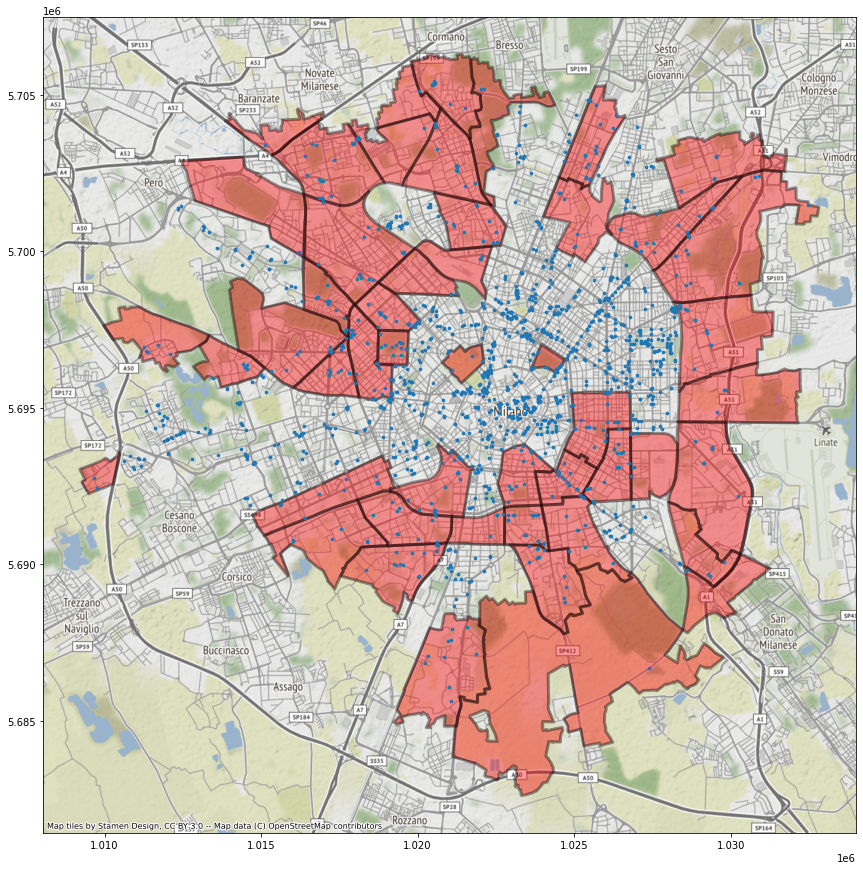

In [20]:
ax = merge2.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k", linewidth= 3)
aree_sosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7)
contextily.add_basemap(ax)

9. una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

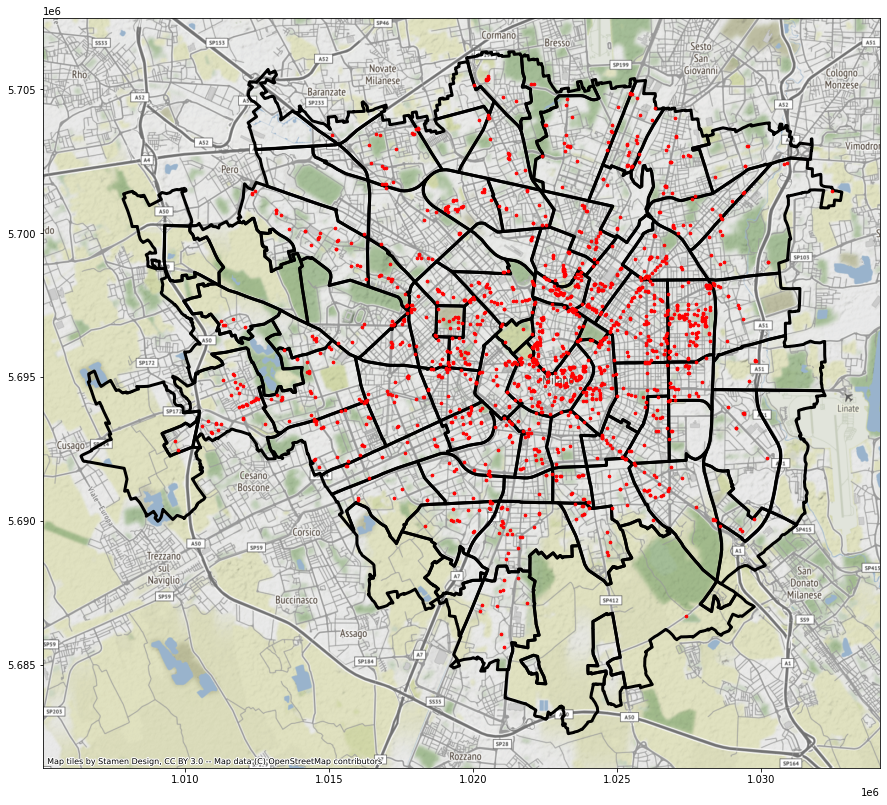

In [21]:
ax = milano.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "none", edgecolor= "k", linewidth= 3)
aree_sosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7, color="r")
contextily.add_basemap(ax)

10. una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

In [23]:
merge3 = pd.merge(milano, duomoGeo, on= "NIL", how= "inner")
merge3.rename(columns={"geometry_x": "geometry"}, inplace= True)
merge3

ID_NIL  ... geometry_y
0       48  ...          6
1       67  ...         18
2       81  ...          5
3       84  ...          2
4       20  ...         36
..     ...  ...        ...
71      68  ...         30
72       2  ...         66
73      33  ...          3
74      17  ...          5
75      53  ...         23

[76 rows x 10 columns]

In [24]:
merge3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

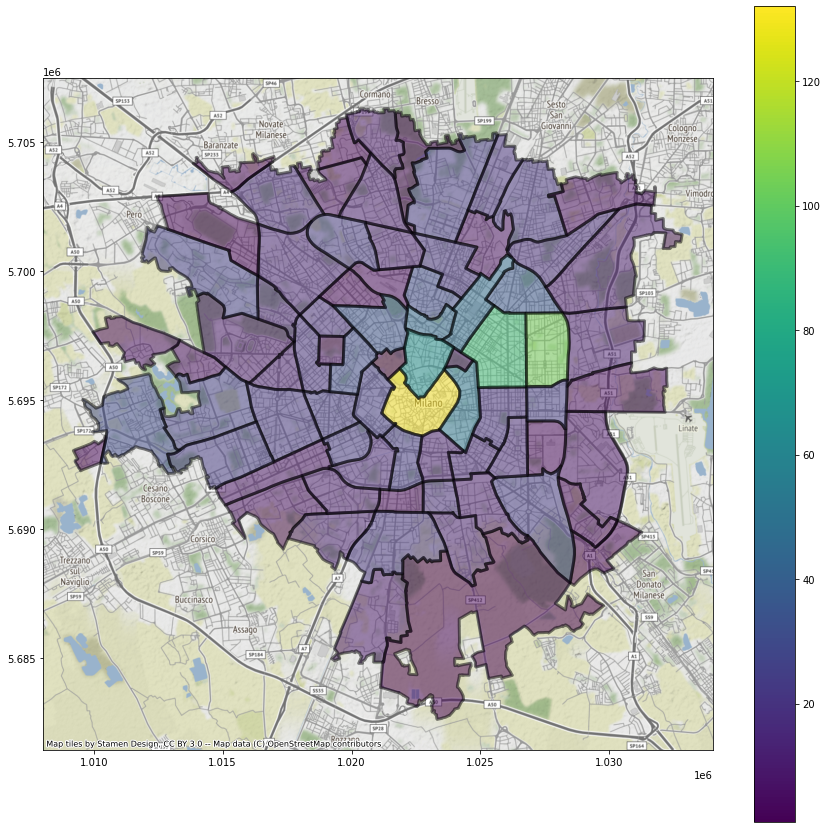

In [25]:
ax = merge3.to_crs(epsg=3857).plot(figsize=(15,15), alpha= 0.5, edgecolor= "k", linewidth= 3, column= "geometry_y", legend= True)
contextily.add_basemap(ax)

11. data una via (inserita dall'utente), avere le aree di sosta di quella via

In [34]:
milano.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
via = input("Inserisci una via: ")

if via in list(stradario.DESCRIZIONE_VIA):
  print(stradario[stradario["DESCRIZIONE_VIA"] == via])
else:
  print("La via da te inserita non è presente all'interno del geodataframe")

Inserisci una via: 8 OTTOBRE 2001
  CODICE_VIA AREA DESCRIZIONE_VIA CIVICO BARRATO  CAP SEZIONE MUNICIPIO
0       4377  VIA  8 OTTOBRE 2001     12          138     916         4


12. dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta

Inserisci il nome di un quartiere: LORETO - CASORETTO - NOLO


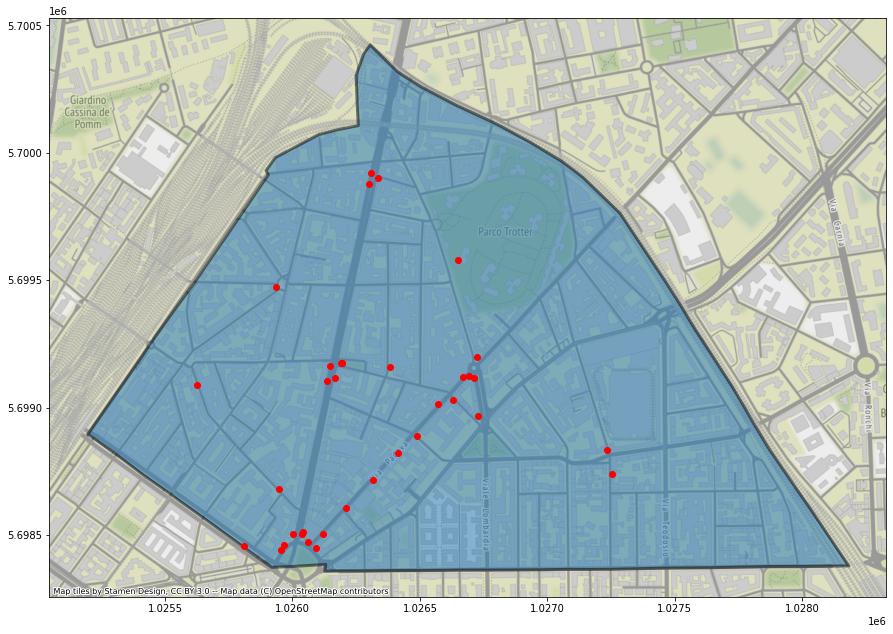

In [45]:
quartiere_input = input("Inserisci il nome di un quartiere: ")

if quartiere_input in list(milano.NIL):
  quartiere= milano[milano["NIL"] == quartiere_input]
  aree_sosta_quartiere = aree_sosta[aree_sosta.intersects(quartiere.geometry.squeeze())]
  aree_sosta_quartiere
  ax = quartiere.to_crs(epsg=3857).plot(figsize=(15,15), alpha= 0.5, edgecolor= "k", linewidth= 3)
  aree_sosta_quartiere.to_crs(epsg=3857).plot(ax=ax, color= "r")
  contextily.add_basemap(ax)
else:
  print("Il quartiere da te inserito non è presente all'inetrnmo del geodataframe")

Inserisci la longitudine: 9.191383
Inserisci la latitudine: 45.464211


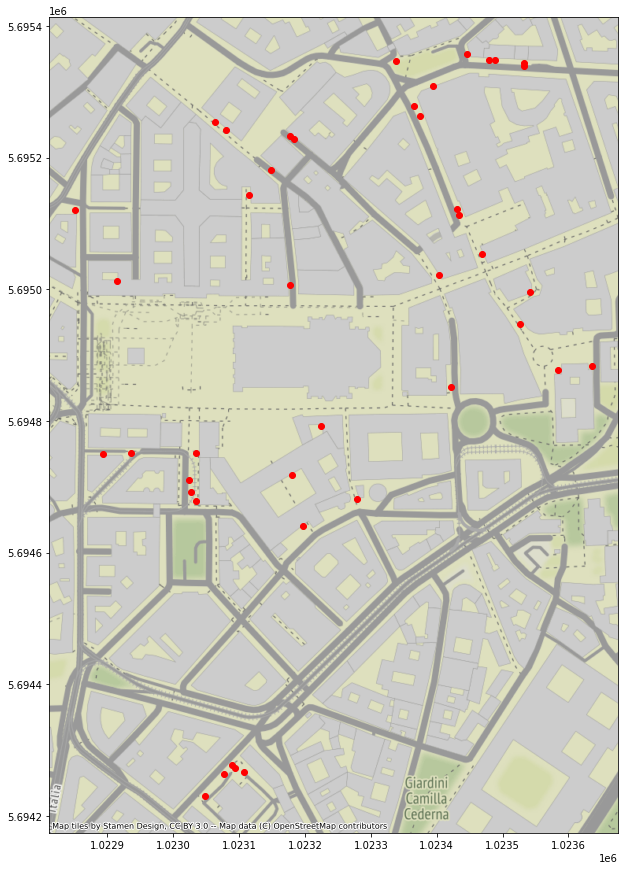

In [46]:
from shapely.geometry import Point

longitudine = float(input("Inserisci la longitudine: "))
latitudine = float(input("Inserisci la latitudine: "))
#9.191383, 45.464211 (coordinate del duomo)
punto = Point(longitudine, latitudine)
punto
buffer_punto = punto.buffer(0.0044) # 500 gradi in metri sono 0.0044 metri
aree_sosta_meno500 = aree_sosta[aree_sosta.within(buffer_punto)]
ax = aree_sosta_meno500.to_crs(epsg=3857).plot(figsize=(15,15), color= "r")
contextily.add_basemap(ax)
